# Gradient Boosting

1. Gradient Boosting is another powerful boosting technique used for both regression and classification tasks. It builds a strong learner by sequentially adding weak learners, each one correcting the errors made by the previous one.

2. Unlike AdaBoost, which focuses on minimizing the overall error, Gradient Boosting optimizes a loss function (often mean squared error for regression)by using gradient descent. One popular implementation of Gradient Boosting is the Gradient Boosting Machines (GBM), as implemented in libraries like XGBoost, LightGBM, and scikit-learn's GradientBoostingClassifier/GradientBoostingRegressor.

#### Let's use a real dataset, the California housing dataset, for regression, and explain Gradient Boosting with intuition:

###### Real Dataset: California Housing Dataset
The California housing dataset contains housing data from the 1990 California census. It includes features such as median income, housing median age, average rooms, average bedrooms, population, households, and geographical information. The target variable is the median house value for California districts.

#### Intuition behind Gradient Boosting:
1. Initial Model (First Weak Learner):

- Gradient Boosting starts with an initial prediction, typically the mean (for regression) or the log-loss (for classification) of the target variable.
- This initial prediction acts as the base or starting point for subsequent models.

2. Building Weak Learners:

-  Weak learners (often decision trees) are added sequentially.
-  Each new weak learner is trained to correct the errors made by the previous ones.
-  Weak learners are typically shallow trees (stumps or small trees) to prevent overfitting.
   
3. Gradient Descent:

-  Gradient Boosting optimizes a loss function by using gradient descent.
-  At each iteration, the model calculates the gradient of the loss function with respect to the predictions of the current        ensemble.
-  It then fits a weak learner to the gradient in order to minimize the loss.


4. Combining Weak Learners:

-  After training each weak learner, it is added to the ensemble.
-  Each weak learner contributes a certain weight to the final prediction, determined during the optimization process.
-  The final prediction is the sum of the initial prediction and the predictions of all weak learners weighted by their             contribution.

5. Regularization:

-  Gradient Boosting models often include regularization techniques to prevent overfitting, such as limiting the depth of the       trees, adding learning rate parameters, or using early stopping.

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the California housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Learning Rate 
In gradient boosting, the learning rate (also called shrinkage or eta) controls the contribution of each tree to the final prediction by scaling the contribution of each tree's prediction. A smaller learning rate generally results in a more robust model by allowing for finer adjustments during the optimization process, but it requires more trees to achieve similar performance.








In [7]:
# Initialize Gradient Boosting regressor
n_estimators = 100  # Number of weak learners
learning_rate = 0.1  # Learning rate
gb_reg = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)


In [8]:
# Train the model
gb_reg.fit(X_train , y_train)

GradientBoostingRegressor(random_state=42)

In [9]:
# Make predictions on the test data
y_pred = gb_reg.predict(X_test)

In [10]:
y_pred

array([0.50518761, 1.09334601, 4.24570956, ..., 4.68181295, 0.85329537,
       1.96275219])

In [11]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [12]:
# Calculate the mean squared error
mse = mean_squared_error(y_test , y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.2939973248643864


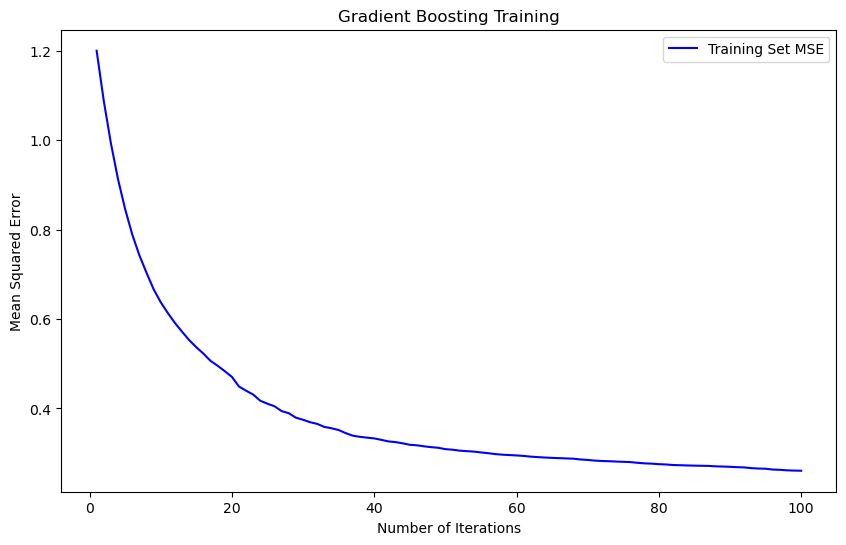

In [13]:
# Plot the improvement of MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_estimators + 1), gb_reg.train_score_, label="Training Set MSE", color="blue")
plt.xlabel("Number of Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Training")
plt.legend()
plt.show()
